In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
df = pd.read_csv('time_series_19-covid-Confirmed.csv')
#df.keys()
df.rename(columns={"Country/Region" : "Country", "Province/State" : "Province"}, inplace=True)
df_italy = df[df['Country'].str.match('Italy')]
df_france = df[df['Country'].str.match('France')]
df_china = df[df['Country'].str.match('Mainland China')]
df_china_total = df_china.sum(numeric_only=True)
cases_china = []
for i in range(len(df_china_total)):
    if i > 1:
        cases_china.append(df_china_total.iloc[i])

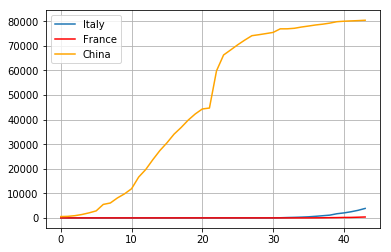

In [82]:
cases_italy = df_italy.loc[:, '1/22/20':].values[0]
cases_france = df_france.loc[:, '1/22/20':].values[0]
time = range(len(cases_italy))
plt.plot(time, cases_italy, label="Italy")
plt.plot(time, cases_france, color="red", label="France")
plt.plot(time, cases_china, color="orange", label="China")
plt.legend(loc="best")
plt.grid()
plt.show()